<a href="https://colab.research.google.com/github/koushik1904/Natural-language-processing-NLB-/blob/main/NLP_LAB_11_3_N_koushik_2403A52057.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data handling libraries
import pandas as pd
import numpy as np

# Text preprocessing libraries
import re
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# Model building
from sklearn.naive_bayes import MultinomialNB

# Train-test split
from sklearn.model_selection import train_test_split

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [ ]:
# Load dataset (change path if needed)
df = pd.read_csv("/content/news.csv", encoding='latin-1')

# The dataset news.csv typically contains columns like 'Unnamed: 0', 'title', 'text', 'label'.
# The error "Length mismatch: Expected axis has 4 elements, new values have 2 elements"
# indicates that the DataFrame `df` currently has 4 columns after reading the CSV.
# The user intends to have columns named "label" and "message".
# Assuming 'label' is the target column and 'text' is the message content column:
df = df[['text', 'label']] # Select only the 'text' and 'label' columns

# Now, rename the selected columns. 'text' becomes 'message', 'label' remains 'label'.
df.columns = ["message", "label"]

# Display first 5 rows
print(df.head())

# Dataset size
print("Dataset Shape:", df.shape)

# Class distribution
print("Class Distribution:")
print(df["label"].value_counts())

                                             message label
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE
2  U.S. Secretary of State John F. Kerry said Mon...  REAL
3  â Kaydee King (@KaydeeKing) November 9, 2016...  FAKE
4  It's primary day in New York and front-runners...  REAL
Dataset Shape: (6335, 2)
Class Distribution:
label
REAL    3171
FAKE    3164
Name: count, dtype: int64


In [ ]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove stopwords
    words = text.split()
    words = [word for word in words if word not in ENGLISH_STOP_WORDS]

    return " ".join(words)

# Apply preprocessing
df["cleaned_message"] = df["message"].apply(preprocess_text)

print(df.head())


                                             message label  \
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE   
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE   
2  U.S. Secretary of State John F. Kerry said Mon...  REAL   
3  â Kaydee King (@KaydeeKing) November 9, 2016...  FAKE   
4  It's primary day in New York and front-runners...  REAL   

                                     cleaned_message  
0  daniel greenfield shillman journalism fellow f...  
1  google pinterest digg linkedin reddit stumbleu...  
2  secretary state john f kerry said monday stop ...  
3  â kaydee king kaydeeking november lesson ton...  
4  primary day new york frontrunners hillary clin...  


In [ ]:
# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Convert text into numerical features
X = vectorizer.fit_transform(df["cleaned_message"])

# Target labels
y = df["label"]

# Feature matrix shape
print("Feature Matrix Shape:", X.shape)

# Display first 10 feature names
print("Sample Features:", vectorizer.get_feature_names_out()[:10])


Feature Matrix Shape: (6335, 90569)
Sample Features: ['aa' 'aaa' 'aaaa' 'aaaaadd' 'aaaasetlayoutnew' 'aaas' 'aab' 'aachen'
 'aachenâ' 'aadhar']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)


Training size: (5068, 90569)
Testing size: (1267, 90569)


In [ ]:
# Initialize model
model = MultinomialNB()

# Train model
model.fit(X_train, y_train)

print("Model trained successfully.")


Model trained successfully.


In [13]:
# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred, pos_label="FAKE")

# Recall
recall = recall_score(y_test, y_pred, pos_label="FAKE")

# F1 Score
f1 = f1_score(y_test, y_pred, pos_label="FAKE")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("\nConfusion Matrix:\n", cm)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.8397790055248618
Precision: 0.981859410430839
Recall: 0.6894904458598726
F1-Score: 0.8101028999064547

Confusion Matrix:
 [[433 195]
 [  8 631]]

Classification Report:

              precision    recall  f1-score   support

        FAKE       0.98      0.69      0.81       628
        REAL       0.76      0.99      0.86       639

    accuracy                           0.84      1267
   macro avg       0.87      0.84      0.84      1267
weighted avg       0.87      0.84      0.84      1267



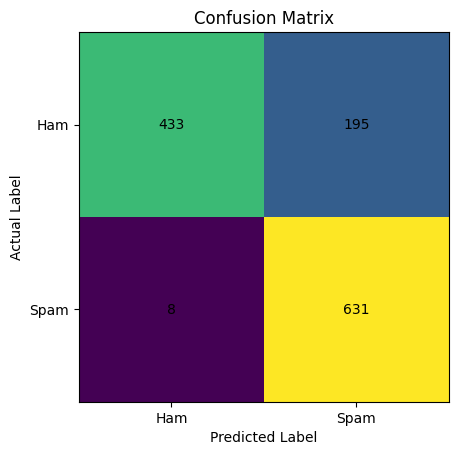

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Confusion matrix already calculated as 'cm'
# If not, uncomment below:
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, y_pred)

plt.figure()

plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

# Add numbers inside boxes
for i in range(len(cm)):
    for j in range(len(cm[0])):
        plt.text(j, i, cm[i, j], ha='center', va='center')

plt.xticks([0,1], ["Ham", "Spam"])
plt.yticks([0,1], ["Ham", "Spam"])

plt.show()
